In [14]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
# svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
# knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# load data
datafile_path = "twt_emotion_analysis/data_cleaned_embedded.csv"

df = pd.read_csv(datafile_path)
df["embedding"] = df.embedding.apply(eval).apply(np.array)  # convert string to array

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    list(df.embedding.values), df.Feeling, test_size=0.2, random_state=42
)

# train random forest classifier
# clf = RandomForestClassifier(n_estimators=10)
# clf = DecisionTreeClassifier()
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
probas = clf.predict_proba(X_test)

report = classification_report(y_test, preds)
print(report)

              precision    recall  f1-score   support

       angry       0.65      0.67      0.66       210
     disgust       0.76      0.73      0.74        88
        fear       0.66      0.59      0.62       135
       happy       0.79      0.82      0.81       624
         sad       0.76      0.76      0.76       467
    surprise       0.88      0.58      0.70        48

    accuracy                           0.75      1572
   macro avg       0.75      0.69      0.71      1572
weighted avg       0.75      0.75      0.75      1572



C:\Users\maula\AppData\Local\Temp/ipykernel_33060/1755204564.py:35: RuntimeWarning: Mean of empty slice.
  avg_x = np.array(x)[df.Feeling == score].mean()
c:\Users\maula\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\maula\AppData\Local\Temp/ipykernel_33060/1755204564.py:36: RuntimeWarning: Mean of empty slice.
  avg_y = np.array(y)[df.Feeling == score].mean()


Text(0.5, 1.0, 'Amazon ratings visualized in language using t-SNE')

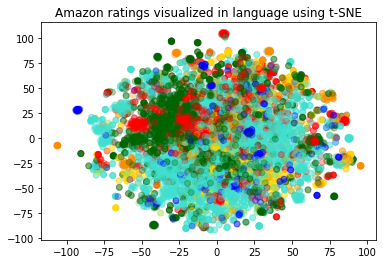

In [42]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from sklearn.manifold import TSNE

# Convert to a list of lists of floats
datafile_path = "twt_emotion_analysis/data_cleaned_embedded.csv"

df = pd.read_csv(datafile_path)
matrix = np.array(df.embedding.apply(eval).to_list())

# Create a t-SNE model and transform the data
tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)
vis_dims = tsne.fit_transform(matrix)
vis_dims.shape

colors = ["red", "darkorange", "gold", "turquoise", "darkgreen", "blue"]
x = [x for x,y in vis_dims]
y = [y for x,y in vis_dims]
emo = ["angry", "digsust", "fear", "happy", "sad", "surprise"]
# color_indices = [emo.index(i) for i in df.Feeling]
color_indices = df.Feeling.replace({
    "angry": 0,
    "disgust": 1,
    "fear": 2,
    "happy": 3,
    "sad": 4,
    "surprise": 5
}).values
# color_indices = [i for i in range()]

colormap = matplotlib.colors.ListedColormap(colors)
plt.scatter(x, y, c=color_indices, cmap=colormap, alpha=0.3)
for score in [0,1,2,3,4,5]:
    avg_x = np.array(x)[df.Feeling == score].mean()
    avg_y = np.array(y)[df.Feeling == score].mean()
    color = colors[score]
    plt.scatter(avg_x, avg_y, marker='x', color=color, s=100)

plt.title("Amazon ratings visualized in language using t-SNE")

SVC(kernel='linear', probability=True) - Average precision score over all classes: 0.88


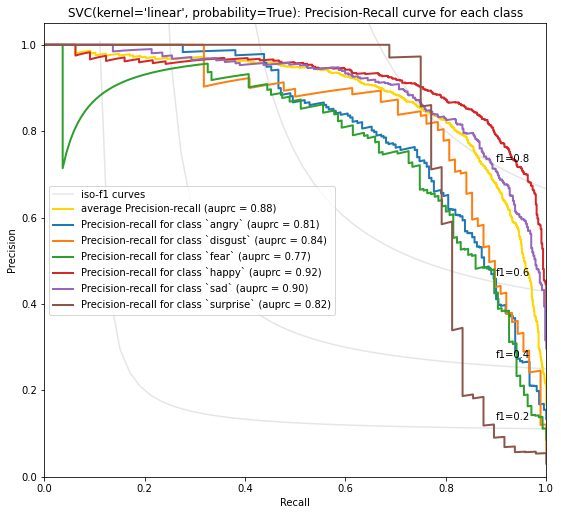

In [8]:
from openai.embeddings_utils import plot_multiclass_precision_recall

plot_multiclass_precision_recall(probas, y_test, ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise'], clf)